In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Had to change CASENUM in EXCEL from General to Number
file_path = "csv_resources/person_filtered.csv"

person_df = pd.read_csv(file_path, encoding='cp1252')
person_df.head(10)

,CASENUM,VE_FORMS,VEH_NO,PER_NO,AGE,PER_TYPNAME,INJ_SEVNAME,SEAT_POSNAME,REST_USENAME,HELM_USENAME,AIR_BAGNAME,DRINKINGNAME,DRUGSNAME,HOSPITALNAME
0,202002121240,2,1,1,61,Driver of a Motor Vehicle In-Transport,No Apparent Injury (O),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,Not Reported,Not Reported,Not Transported for Treatment
1,202002121240,2,2,1,26,Driver of a Motor Vehicle In-Transport,No Apparent Injury (O),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,Not Reported,Not Reported,Not Transported for Treatment
2,202002121829,1,1,1,23,Driver of a Motor Vehicle In-Transport,Suspected Minor Injury (B),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Deployed- Combination,No (Alcohol Not Involved),No (drugs not involved),EMS Ground
3,202002121849,2,1,1,998,Driver of a Motor Vehicle In-Transport,Unknown/Not Reported,"Front Seat, Left Side",Not Reported,Not Applicable,Not Reported,Not Reported,Not Reported,Not Transported for Treatment
4,202002121849,2,2,1,21,Driver of a Motor Vehicle In-Transport,No Apparent Injury (O),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,No (Alcohol Not Involved),No (drugs not involved),Not Transported for Treatment
5,202002123484,1,1,1,20,Driver of a Motor Vehicle In-Transport,No Apparent Injury (O),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,Not Reported,Not Reported,Not Transported for Treatment
6,202002123576,1,1,1,23,Driver of a Motor Vehicle In-Transport,No Apparent Injury (O),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,Not Reported,Not Reported,Not Transported for Treatment
7,202002123576,1,1,2,24,Passenger of a Motor Vehicle In-Transport,No Apparent Injury (O),"Front Seat, Right Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,Not Reported,Not Reported,Not Transported for Treatment
8,202002125146,1,1,1,57,Driver of a Motor Vehicle In-Transport,Possible Injury (C),"Front Seat, Left Side",Shoulder and Lap Belt Used,Not Applicable,Not Deployed,Not Reported,Not Reported,EMS Ground
9,202002125146,1,1,2,998,Passenger of a Motor Vehicle In-Transport,No Apparent Injury (O),Not Reported,Not Reported,Not Applicable,Not Reported,Not Reported,Not Reported,Not Transported for Treatment


In [4]:
person_df.dtypes

CASENUM          int64
VE_FORMS         int64
VEH_NO           int64
PER_NO           int64
AGE              int64
PER_TYPNAME     object
INJ_SEVNAME     object
SEAT_POSNAME    object
REST_USENAME    object
HELM_USENAME    object
AIR_BAGNAME     object
DRINKINGNAME    object
DRUGSNAME       object
HOSPITALNAME    object
dtype: object

In [5]:
person_df[person_df.columns[0]].count()

131962

In [6]:
person_df.nunique()

CASENUM         54726
VE_FORMS           10
VEH_NO             16
PER_NO             11
AGE               108
PER_TYPNAME        12
INJ_SEVNAME         8
SEAT_POSNAME       28
REST_USENAME       14
HELM_USENAME        8
AIR_BAGNAME        10
DRINKINGNAME        4
DRUGSNAME           4
HOSPITALNAME        9
dtype: int64

In [7]:
person_df.isnull().sum()

CASENUM         0
VE_FORMS        0
VEH_NO          0
PER_NO          0
AGE             0
PER_TYPNAME     0
INJ_SEVNAME     0
SEAT_POSNAME    0
REST_USENAME    0
HELM_USENAME    0
AIR_BAGNAME     0
DRINKINGNAME    0
DRUGSNAME       0
HOSPITALNAME    0
dtype: int64

In [8]:
duplicates = person_df.duplicated()
duplicates.sum()

0

## AGE 

In [9]:
# Checking for unique age values
person_df.AGE.unique()

# 998 was not reported, 999 was unknown, 120 seems unlikely

array([ 61,  26,  23, 998,  21,  20,  24,  57,  48,  43,  44,  22,  17,
        16,  60,  19,  38,  45,  70,  35,  36,  54,  58,  47,  18,  25,
        59,   0,   3,   2,  27,  32,   7,   9,  28,  68,  76,  46,  63,
        30,  29,  37,  13, 999,  50,  49,  42,  71,  39,  55,  69,  15,
         8,  33,   5,   1,  41,  11,  34,  64,  73,  78,  53,  82,  10,
        67,  81,  51,  79,  74,  12,   6,  31,  14,  56,  66,  77,  52,
        83,  85,  92,  40,  62,  65,  72,  87,  84,  75,   4,  90,  94,
        80,  88,  86,  89,  91,  97,  93,  95, 114, 107, 119,  96, 100,
       120, 101,  98,  99], dtype=int64)

In [10]:
# How many in each age group
person_df['AGE'].value_counts()


998    9451
19     3393
18     3263
20     3242
21     3156
       ... 
120       2
107       1
114       1
101       1
98        1
Name: AGE, Length: 108, dtype: int64

In [11]:
# Count number of 999s
person_df['AGE'].value_counts()[999]

1258

# Number of 998 + 999 = 10709 </br>
# 10709 / 131962 = ~8.1% of values have age either not reported or unknown</br>
# How should we handle this? NaN or Transform?

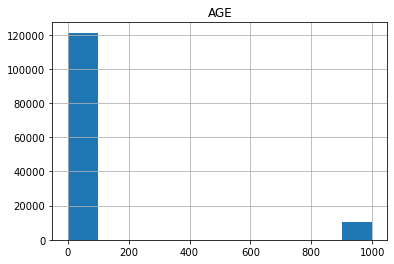

In [14]:
# leaving 998/999 values as is

person_df.hist(column='AGE');


In [21]:
# coverting 998/999 values to 121
person_df['AGE'] = person_df['AGE'].replace([998,999], [121,121])
person_df['AGE']

0          61
1          26
2          23
3         121
4          21
         ... 
131957     50
131958     15
131959     15
131960     15
131961     46
Name: AGE, Length: 131962, dtype: int64

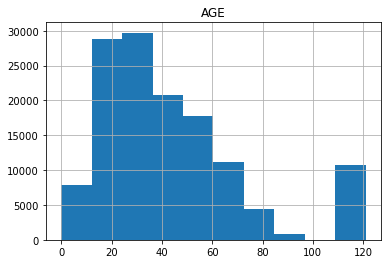

In [22]:
person_df.hist(column='AGE');

In [23]:
person_df['AGE'].describe()

count    131962.000000
mean         43.921273
std          29.216858
min           0.000000
25%          23.000000
50%          36.000000
75%          56.000000
max         121.000000
Name: AGE, dtype: float64

# Injury

In [24]:
person_df['INJ_SEVNAME'].value_counts()

No Apparent Injury (O)          84402
Possible Injury (C)             19977
Suspected Minor Injury (B)      13442
Suspected Serious Injury (A)     7548
Unknown/Not Reported             4828
Fatal Injury (K)                 1520
Injured, Severity Unknown         243
Died Prior to Crash*                2
Name: INJ_SEVNAME, dtype: int64

(array([5.6560e+03, 1.8957e+04, 1.9037e+04, 1.3545e+04, 1.1334e+04,
        7.1580e+03, 2.7210e+03, 4.8600e+02, 9.0000e+00, 5.4990e+03]),
 array([  0. ,  12.1,  24.2,  36.3,  48.4,  60.5,  72.6,  84.7,  96.8,
        108.9, 121. ]),
 <BarContainer object of 10 artists>)

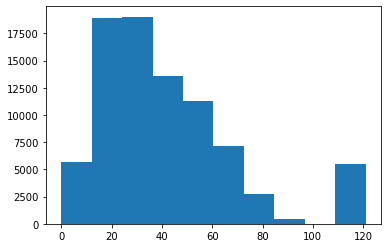

In [31]:
# Histogram for No injury / age
noinjury_df =  person_df[person_df['INJ_SEVNAME'] == 'No Apparent Injury (O)']
plt.hist(noinjury_df['AGE'])

(array([6.770e+02, 3.157e+03, 3.273e+03, 2.207e+03, 1.962e+03, 1.174e+03,
        5.080e+02, 1.080e+02, 2.000e+00, 3.740e+02]),
 array([  0. ,  12.1,  24.2,  36.3,  48.4,  60.5,  72.6,  84.7,  96.8,
        108.9, 121. ]),
 <BarContainer object of 10 artists>)

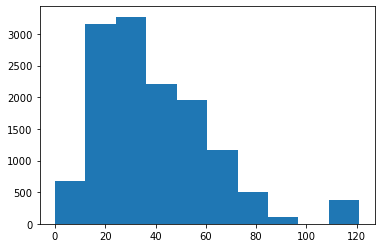

In [28]:
# Histogram for minor injury and age
minorinjury_df = person_df[person_df['INJ_SEVNAME'] == 'Suspected Minor Injury (B)']
plt.hist(minorinjury_df['AGE'])

(array([ 247., 1772., 2020., 1254., 1065.,  680.,  286.,   56.,    0.,
         168.]),
 array([  0. ,  12.1,  24.2,  36.3,  48.4,  60.5,  72.6,  84.7,  96.8,
        108.9, 121. ]),
 <BarContainer object of 10 artists>)

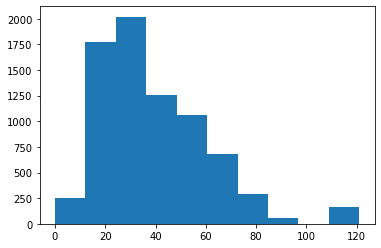

In [29]:
# Histogram for serious injury and age
seriousinjury_df = person_df[person_df['INJ_SEVNAME'] == 'Suspected Serious Injury (A)']
plt.hist(seriousinjury_df['AGE'])

(array([ 30., 260., 366., 266., 273., 174.,  87.,  27.,   0.,  37.]),
 array([  0. ,  12.1,  24.2,  36.3,  48.4,  60.5,  72.6,  84.7,  96.8,
        108.9, 121. ]),
 <BarContainer object of 10 artists>)

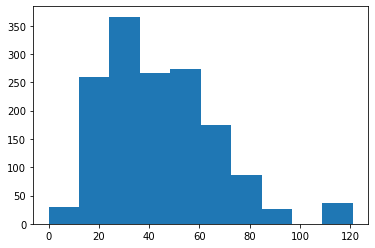

In [30]:
# Histogram for Fatal Injury / age
fatalinjury_df = person_df[person_df['INJ_SEVNAME'] == 'Fatal Injury (K)']
plt.hist(fatalinjury_df['AGE'])

## It doesn't look like there's much of a distribution shift from No injuries and Minor/Major injuries. There does seem to be a bit of a shift away from the teen/twenty bin towards thirty/fourty and older for fatal injuries.

# Seatbelts

In [36]:
# Unique values for seatbelts
person_df.REST_USENAME.unique()

array(['Shoulder and Lap Belt Used', 'Not Reported',
       'Reported as Unknown', 'None Used/Not Applicable',
       'Not a Motor Vehicle Occupant', 'Child Restraint Type Unknown',
       'Restraint Used - Type Unknown',
       'Child Restraint System - Rear Facing', 'Booster Seat',
       'Child Restraint System - Forward Facing',
       'Shoulder Belt Only Used', 'Lap Belt Only Used', 'Other',
       'Racing-Style Harness Used'], dtype=object)

In [37]:
person_df['REST_USENAME'].value_counts()

Shoulder and Lap Belt Used                 98566
None Used/Not Applicable                    8872
Reported as Unknown                         8377
Not Reported                                5080
Not a Motor Vehicle Occupant                5077
Child Restraint Type Unknown                1688
Child Restraint System - Forward Facing     1231
Lap Belt Only Used                          1047
Shoulder Belt Only Used                      819
Child Restraint System - Rear Facing         465
Booster Seat                                 439
Restraint Used - Type Unknown                281
Other                                         18
Racing-Style Harness Used                      2
Name: REST_USENAME, dtype: int64

In [50]:
# Change "None Used/Not Applicable" to "Not Used"
person_df['REST_USENAME'] = person_df['REST_USENAME'].replace(['None Used/Not Applicable'], ['None Used'])
person_df['REST_USENAME'].value_counts()

Shoulder and Lap Belt Used                 98566
None Used                                   8872
Reported as Unknown                         8377
Not Reported                                5080
Not a Motor Vehicle Occupant                5077
Child Restraint Type Unknown                1688
Child Restraint System - Forward Facing     1231
Lap Belt Only Used                          1047
Shoulder Belt Only Used                      819
Child Restraint System - Rear Facing         465
Booster Seat                                 439
Restraint Used - Type Unknown                281
Other                                         18
Racing-Style Harness Used                      2
Name: REST_USENAME, dtype: int64